In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
resultados_exames = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [17]:
SEED = 123143
np.random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id','diagnostico'], axis=1)
valores_exames_v1 = valores_exames.drop(columns=['exame_33'], axis=1)

diagnostico = resultados_exames['diagnostico']

x_train, x_test, y_train, y_test = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

In [18]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.9239766081871345

In [21]:
model_dummy = DummyClassifier(strategy='most_frequent')
model_dummy.fit(x_train, y_train)
model_dummy.score(x_test, y_test).round(2)

0.67

In [33]:
dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]],axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames',value_name='valores')
dados_plot


,diagnostico,exames,valores
0,M,exame_1,17.9900
1,M,exame_1,20.5700
2,M,exame_1,19.6900
3,M,exame_1,11.4200
4,M,exame_1,20.2900
...,...,...,...
5685,M,exame_10,0.1726
5686,M,exame_10,0.1752
5687,M,exame_10,0.1590
5688,M,exame_10,0.2397


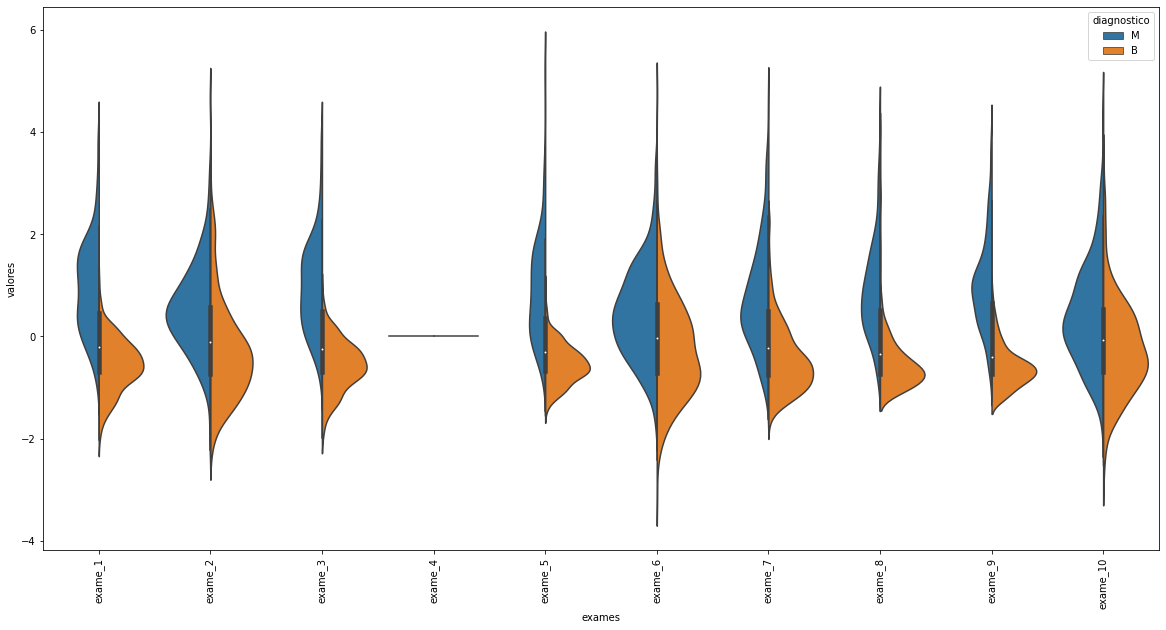

In [38]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]],axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames',value_name='valores')

ax = sns.violinplot(x='exames', y='valores',hue='diagnostico', data=dados_plot, split=True)
ax.tick_params(axis='x', rotation=90)
ax.figure.set_size_inches(20,10)

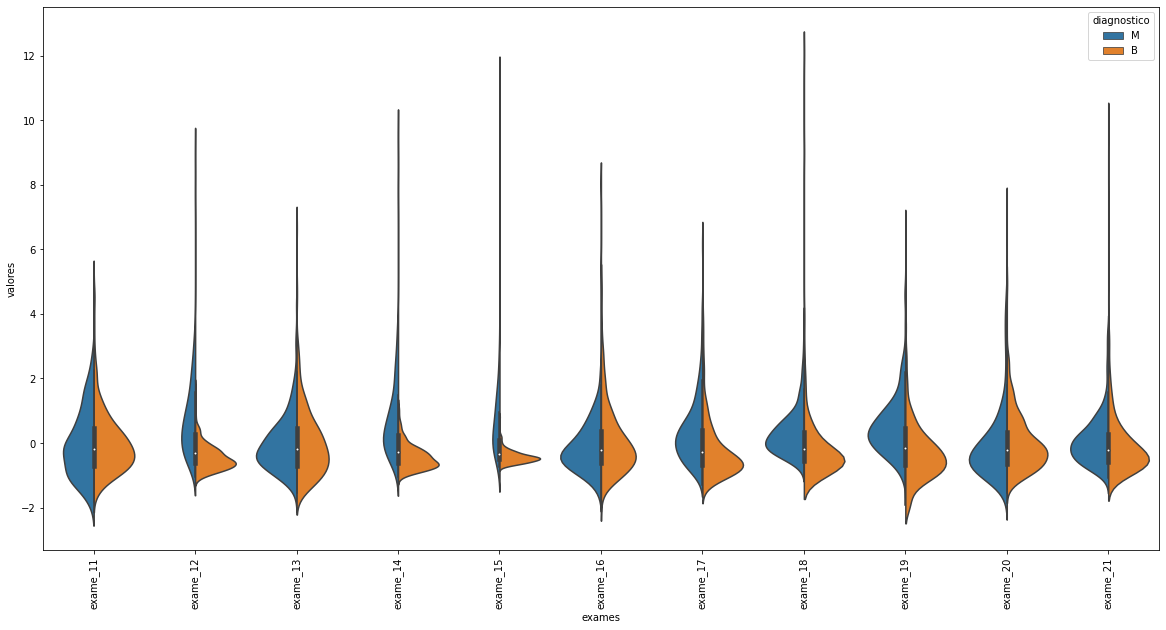

In [49]:
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,10:21]],axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames',value_name='valores')

ax = sns.violinplot(x='exames', y='valores',hue='diagnostico', data=dados_plot, split=True)
ax.tick_params(axis='x', rotation=90)
ax.figure.set_size_inches(20,10)

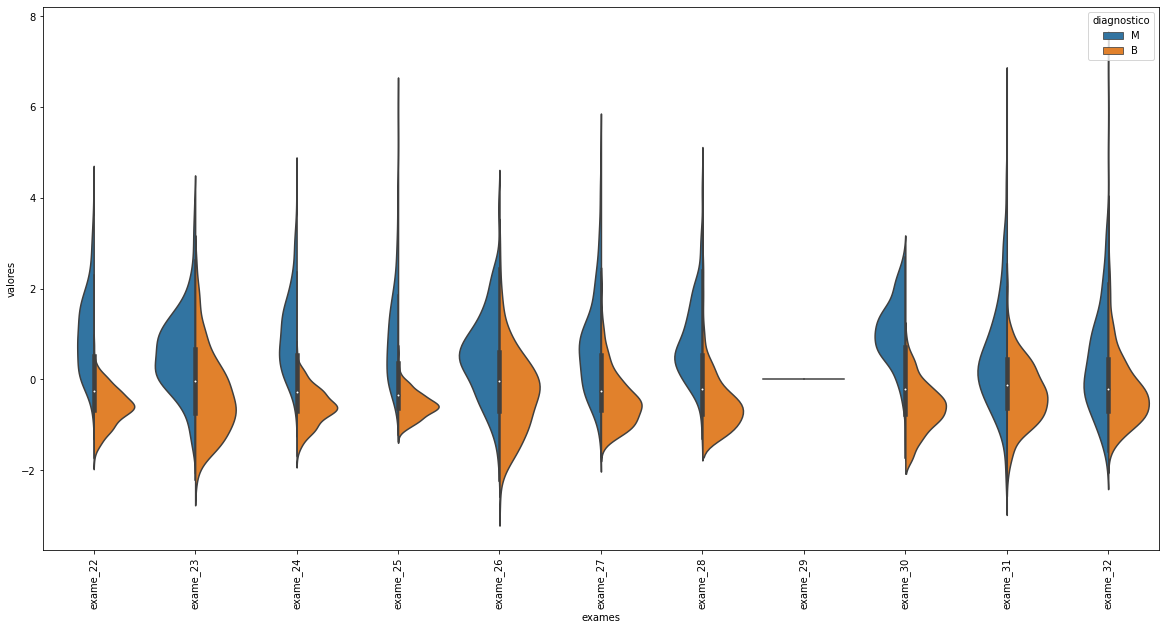

In [50]:
dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,21:32]],axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames',value_name='valores')

ax = sns.violinplot(x='exames', y='valores',hue='diagnostico', data=dados_plot, split=True)
ax.tick_params(axis='x', rotation=90)
ax.figure.set_size_inches(20,10)

In [55]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'], axis=1)

def classificar(valores):
    SEED = 1234
    np.random.seed(SEED)
    
    x_train, x_test, y_train, y_test = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)
    model = RandomForestClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    print(f'O score é: {(model.score(x_test, y_test).round(2))*100}%')
    

In [56]:
classificar(valores_exames_v3)

O score é: 92.0%


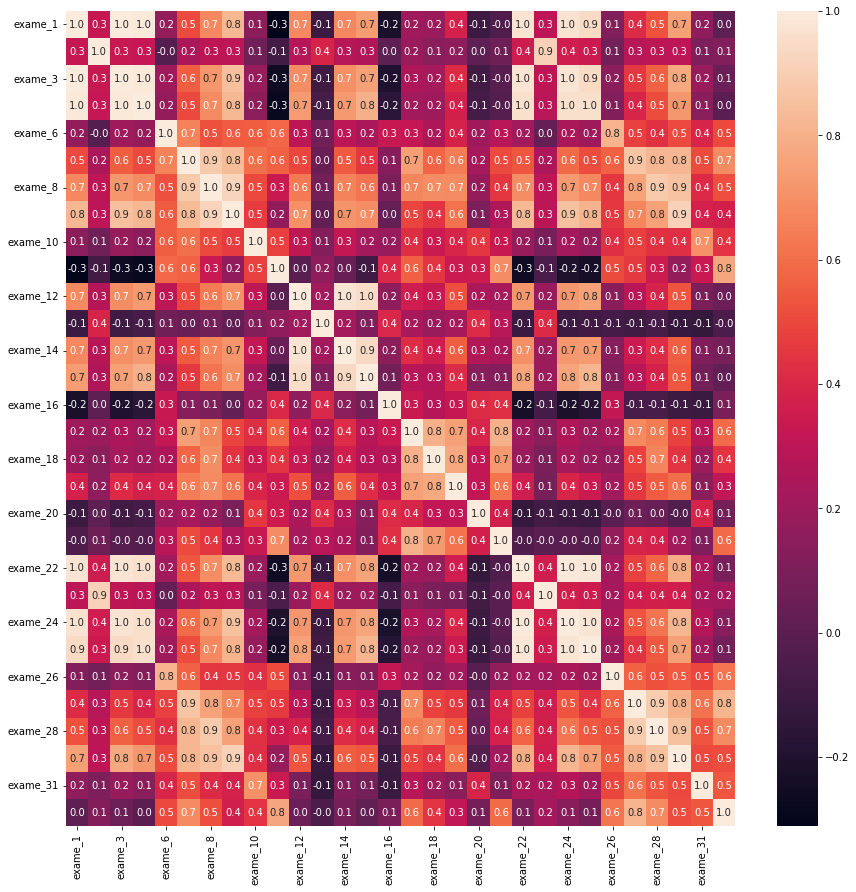

In [62]:
correlacao = valores_exames_v3.corr()
ax = sns.heatmap(correlacao, annot=True, fmt='.1f')
ax.figure.set_size_inches(15,15)

In [79]:
correlacao_v1 = correlacao[correlacao>0.99]

In [81]:
correlacao_v2 = correlacao_v1.sum()

In [84]:
correlacao_v3 = correlacao_v2[correlacao_v2>1]
correlacao_v3

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [87]:
valores_exames_v4 = valores_exames_v3.drop(columns=correlacao_v3.keys())

In [89]:
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [90]:
classificar(valores_exames_v4)

O score é: 92.0%


In [91]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3','exame_24'])

In [92]:
classificar(valores_exames_v5)

O score é: 92.0%


In [95]:
selecionar_kmelhores = SelectKBest(chi2, k=5, )

In [98]:
valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4','exame_29','exame_3','exame_24'])


In [102]:
SEED = 1234
np.random.seed(SEED)
x_train, x_test, y_train, y_test = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
selecionar_kmelhores.fit(x_train, y_train)
treino_kmelhores = selecionar_kmelhores.transform(x_train)
teste_kmelhores = selecionar_kmelhores.transform(x_test)

In [103]:
model = RandomForestClassifier(n_estimators=100, random_state=1234)
model.fit(treino_kmelhores, y_train)
print(f'O score é: {(model.score(teste_kmelhores, y_test).round(2))*100}%')

O score é: 92.0%


In [105]:
matriz = metrics.confusion_matrix(y_test, model.predict(teste_kmelhores))

array([[100,   5],
       [  8,  58]], dtype=int64)

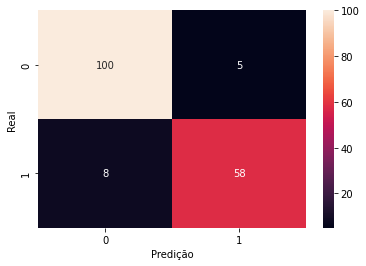

In [108]:
ax = sns.heatmap(matriz, annot=True, fmt='d').set(xlabel = 'Predição', ylabel='Real')


O score é: 87.0%


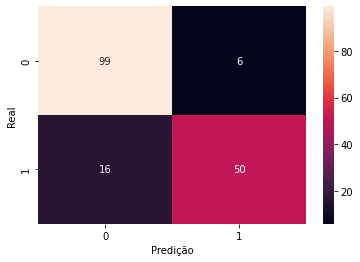

In [123]:
SEED = 1234
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
model = RandomForestClassifier(n_estimators=100, random_state=1234)
model.fit(x_train, y_train)

rfe = RFE(estimator=model, n_features_to_select=2, step=1)
rfe.fit(x_train, y_train)
treino_rfe = rfe.transform(x_train)
teste_rfe = rfe.transform(x_test)
model.fit(treino_rfe, y_train)

print(f'O score é: {(model.score(teste_rfe, y_test).round(2))*100}%')

matriz = metrics.confusion_matrix(y_test, model.predict(teste_rfe))
ax = sns.heatmap(matriz, annot=True, fmt='d').set(xlabel = 'Predição', ylabel='Real')


C:\Users\mu.simao\Documents\Python\projeto2\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


O score é: 93.0%


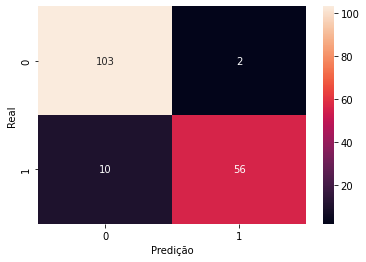

In [116]:
SEED = 1234
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
model = RandomForestClassifier(n_estimators=100, random_state=1234)
model.fit(x_train, y_train)

rfecv = RFECV(estimator=model, cv=5, step=1, scoring='accuracy')
rfecv.fit(x_train, y_train)
treino_rfecv = rfecv.transform(x_train)
teste_rfecv = rfecv.transform(x_test)
model.fit(treino_rfecv, y_train)

print(f'O score é: {(model.score(teste_rfecv, y_test).round(2))*100}%')

matriz = metrics.confusion_matrix(y_test, model.predict(teste_rfecv))
ax = sns.heatmap(matriz, annot=True, fmt='d').set(xlabel = 'Predição', ylabel='Real')


In [118]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [119]:
x_train.columns[rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

C:\Users\mu.simao\Documents\Python\projeto2\venv\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


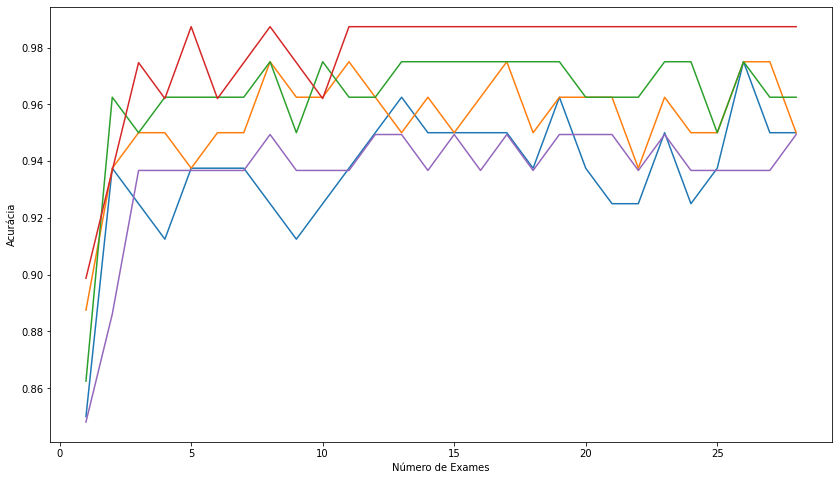

In [122]:
plt.figure(figsize=(14,8))
plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [124]:
valores_exames_v7 = rfe.transform(valores_exames_v6)

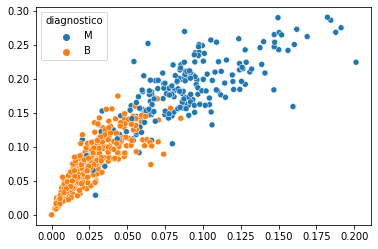

In [126]:
ax = sns.scatterplot(x = valores_exames_v7[:,0], y=valores_exames_v7[:,1], hue=diagnostico)


In [131]:
pca = PCA(n_components= 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

In [129]:
valores_exames_v8

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

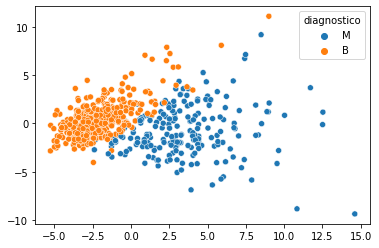

In [132]:
ax = sns.scatterplot(x = valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue=diagnostico)


C:\Users\mu.simao\Documents\Python\projeto2\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\mu.simao\Documents\Python\projeto2\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


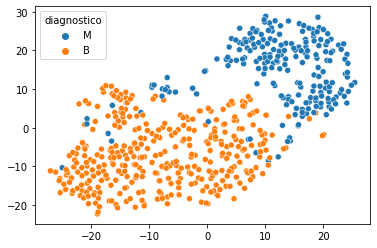

In [135]:
tsne = TSNE(n_components= 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
ax = sns.scatterplot(x = valores_exames_v9[:,0], y=valores_exames_v9[:,1], hue=diagnostico)